In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [3]:
# Load feature-engineered data
print("="*80)
print("REVENUE OPTIMIZATION MODEL - PRICING PREDICTION")
print("="*80)

df = pd.read_csv('C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/product_features.csv')

print(f"\n📊 Loaded: {len(df):,} products with engineered features")
print(f"📊 Features: {len(df.columns)} columns")
print(f"\n🎯 Goal: Build ML model to predict optimal prices for revenue maximization")

REVENUE OPTIMIZATION MODEL - PRICING PREDICTION

📊 Loaded: 3,469 products with engineered features
📊 Features: 29 columns

🎯 Goal: Build ML model to predict optimal prices for revenue maximization


In [5]:
# Select features for the model
print("="*80)
print("STEP 1: FEATURE SELECTION")
print("="*80)

# Our target: optimal_price_estimate
# Our features: product characteristics that influence pricing

# Select numeric features for modeling
feature_columns = [
    'avg_price',              # Current price (baseline)
    'price_elasticity',       # How price-sensitive is demand?
    'num_orders',             # Volume/popularity
    'avg_quantity',           # Typical order size
    'total_quantity_sold',    # Total volume moved
    'price_std',              # Price variation (has it been tested?)
    'quantity_std',           # Demand variability
    'avg_revenue_per_transaction',  # Transaction value
    'seasonality_score',      # Seasonal patterns
    'price_volatility',       # Relative price variation
    'orders_per_day',         # Frequency
    'avg_basket_size',        # Basket economics
    'revenue_share'           # Market importance
]

target_column = 'optimal_price_estimate'

# Check for missing values in features
print(f"\nSelected {len(feature_columns)} features for modeling:")
for col in feature_columns:
    print(f"  ✓ {col}")

print(f"\nTarget variable: {target_column}")

# Check missing values
missing_check = df[feature_columns + [target_column]].isnull().sum()
print(f"\nMissing values check:")
print(missing_check[missing_check > 0])

# Drop rows with missing values (if any)
df_model = df[feature_columns + [target_column]].dropna()
print(f"\n✅ Clean dataset: {len(df_model):,} products ready for modeling")

STEP 1: FEATURE SELECTION

Selected 13 features for modeling:
  ✓ avg_price
  ✓ price_elasticity
  ✓ num_orders
  ✓ avg_quantity
  ✓ total_quantity_sold
  ✓ price_std
  ✓ quantity_std
  ✓ avg_revenue_per_transaction
  ✓ seasonality_score
  ✓ price_volatility
  ✓ orders_per_day
  ✓ avg_basket_size
  ✓ revenue_share

Target variable: optimal_price_estimate

Missing values check:
price_elasticity    25
dtype: int64

✅ Clean dataset: 3,444 products ready for modeling


In [7]:
# Prepare X and y
X = df_model[feature_columns]
y = df_model[target_column]

print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✅ Data split complete:")
print(f"   Training set: {len(X_train):,} products")
print(f"   Test set: {len(X_test):,} products")
print(f"\n   Feature matrix shape: {X_train.shape}")
print(f"   Target range: £{y_train.min():.2f} - £{y_train.max():.2f}")


TRAIN-TEST SPLIT

✅ Data split complete:
   Training set: 2,755 products
   Test set: 689 products

   Feature matrix shape: (2755, 13)
   Target range: £0.09 - £150.17


In [9]:
# Train baseline model - Random Forest
print("="*80)
print("STEP 2: BASELINE MODEL (Random Forest)")
print("="*80)

# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Train
print("\nTraining Random Forest...")
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Evaluate
print("\n📊 Random Forest Performance:")
print(f"\nTraining Set:")
print(f"  MAE:  £{mean_absolute_error(y_train, y_pred_rf_train):.2f}")
print(f"  RMSE: £{np.sqrt(mean_squared_error(y_train, y_pred_rf_train)):.2f}")
print(f"  R²:   {r2_score(y_train, y_pred_rf_train):.4f}")

print(f"\nTest Set:")
print(f"  MAE:  £{mean_absolute_error(y_test, y_pred_rf_test):.2f}")
print(f"  RMSE: £{np.sqrt(mean_squared_error(y_test, y_pred_rf_test)):.2f}")
print(f"  R²:   {r2_score(y_test, y_pred_rf_test):.4f}")

print("\n💡 Lower MAE/RMSE = better predictions")
print("💡 R² closer to 1.0 = better fit")

STEP 2: BASELINE MODEL (Random Forest)

Training Random Forest...

📊 Random Forest Performance:

Training Set:
  MAE:  £0.06
  RMSE: £0.75
  R²:   0.9873

Test Set:
  MAE:  £0.13
  RMSE: £1.26
  R²:   0.9762

💡 Lower MAE/RMSE = better predictions
💡 R² closer to 1.0 = better fit



FEATURE IMPORTANCE (Random Forest)
                    Feature  Importance
                  avg_price        0.93
                  price_std        0.05
avg_revenue_per_transaction        0.01
              revenue_share        0.00
          seasonality_score        0.00
           price_volatility        0.00
             orders_per_day        0.00
           price_elasticity        0.00
               quantity_std        0.00
        total_quantity_sold        0.00
            avg_basket_size        0.00
                 num_orders        0.00
               avg_quantity        0.00


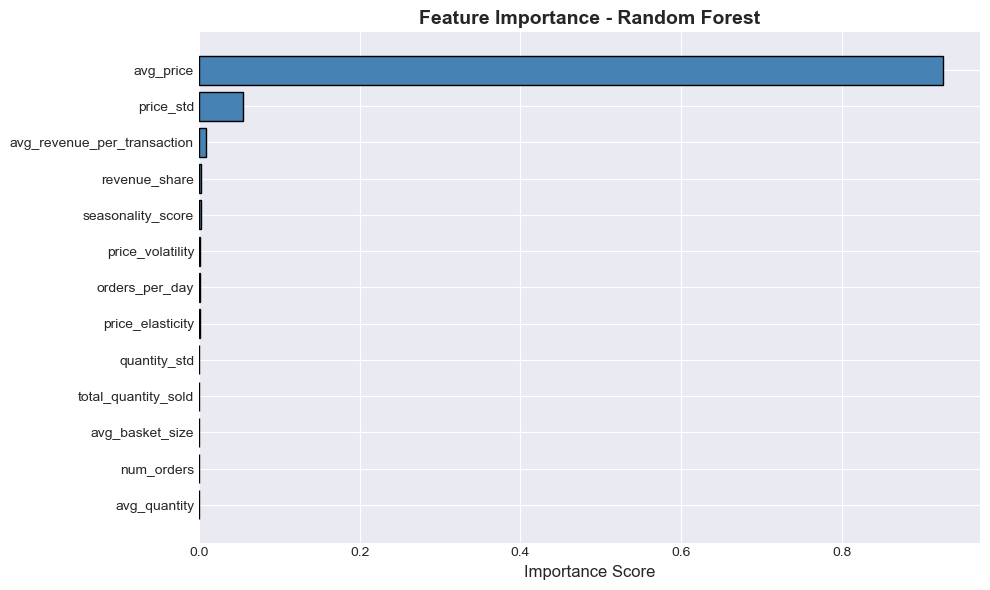


💡 Most important features drive optimal pricing decisions!


In [11]:
# Feature importance from Random Forest
print("\n" + "="*80)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*80)

feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Most important features drive optimal pricing decisions!")

In [15]:
# Load transaction-level data with features
print("="*80)
print("NEW APPROACH: REVENUE PREDICTION MODEL")
print("="*80)

df_trans = pd.read_csv('C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/transactions_with_features.csv')
df_trans['InvoiceDate'] = pd.to_datetime(df_trans['InvoiceDate'])

print(f"\n📊 Loaded: {len(df_trans):,} transactions")
print(f"\n🎯 New Goal: Predict revenue given price and product features")
print(f"   → Then optimize: find price that maximizes predicted revenue")

NEW APPROACH: REVENUE PREDICTION MODEL

📊 Loaded: 530,104 transactions

🎯 New Goal: Predict revenue given price and product features
   → Then optimize: find price that maximizes predicted revenue


In [17]:
# Create modeling dataset at transaction level
print("\n" + "="*80)
print("PREPARING TRANSACTION-LEVEL FEATURES")
print("="*80)

# Features for predicting revenue
modeling_features = [
    'UnitPrice',              # Price (our main variable!)
    'price_elasticity',       # How price-sensitive?
    'seasonality_score',      # Seasonal effects
    'Quantity'                # We'll predict Revenue = f(Price, Quantity, Features)
]

# But wait - if we include Quantity, we're cheating because Quantity depends on Price!
# Let's think about this differently...

print("\n🤔 CHALLENGE: Revenue = UnitPrice × Quantity")
print("   But Quantity DEPENDS ON Price (via elasticity)")
print("\n💡 SOLUTION: We need to model Quantity as function of Price first!")
print("\n   Step 1: Build model to predict Quantity given Price")
print("   Step 2: Revenue = Predicted_Quantity × Price")
print("   Step 3: Find price that maximizes Revenue")


PREPARING TRANSACTION-LEVEL FEATURES

🤔 CHALLENGE: Revenue = UnitPrice × Quantity
   But Quantity DEPENDS ON Price (via elasticity)

💡 SOLUTION: We need to model Quantity as function of Price first!

   Step 1: Build model to predict Quantity given Price
   Step 2: Revenue = Predicted_Quantity × Price
   Step 3: Find price that maximizes Revenue


In [19]:
# Aggregate data: For each product × price point, what's average quantity?
print("\n" + "="*80)
print("AGGREGATING PRICE-QUANTITY RELATIONSHIPS")
print("="*80)

# For each product, at each price point, what was average quantity sold?
price_quantity_data = df_trans.groupby(['StockCode', 'UnitPrice']).agg({
    'Quantity': 'mean',
    'Revenue': 'mean',
    'InvoiceNo': 'count',
    'price_elasticity': 'first',
    'seasonality_score': 'first'
}).reset_index()

price_quantity_data.rename(columns={'InvoiceNo': 'num_transactions'}, inplace=True)

# Only keep products with multiple price points (so we can learn elasticity)
products_with_variation = price_quantity_data.groupby('StockCode')['UnitPrice'].nunique()
products_with_variation = products_with_variation[products_with_variation >= 3].index

price_quantity_data = price_quantity_data[
    price_quantity_data['StockCode'].isin(products_with_variation)
]

print(f"\n✅ Dataset for modeling:")
print(f"   {len(price_quantity_data):,} price-quantity observations")
print(f"   {price_quantity_data['StockCode'].nunique():,} products with price variation")
print(f"\nSample:")
print(price_quantity_data.head(10))


AGGREGATING PRICE-QUANTITY RELATIONSHIPS

✅ Dataset for modeling:
   13,800 price-quantity observations
   2,837 products with price variation

Sample:
   StockCode  UnitPrice  Quantity  Revenue  num_transactions  \
0      10002       0.85     16.48    14.01                50   
1      10002       1.63      1.29     2.10                 7   
2      10002       1.66      1.93     3.20                14   
9      10125       0.42     26.00    10.92                10   
10     10125       0.79      2.00     1.58                12   
11     10125       0.81      3.60     2.92                10   
12     10125       0.85     17.89    15.21                54   
13     10125       1.63      1.20     1.96                 5   
14     10125       1.66      1.33     2.21                 3   
15     10133       0.42     21.64     9.09                95   

    price_elasticity  seasonality_score  
0              -0.30               0.80  
1              -0.30               0.80  
2              -

In [21]:
# Prepare features for quantity prediction
print("="*80)
print("STEP 1: BUILD QUANTITY PREDICTION MODEL")
print("="*80)

# Features to predict quantity
quantity_features = [
    'UnitPrice',              # The price we're testing
    'price_elasticity',       # How sensitive is this product?
    'seasonality_score',      # Seasonal effects
    'num_transactions'        # Historical volume (popularity)
]

# Target: Quantity sold at that price
X_qty = price_quantity_data[quantity_features].dropna()
y_qty = price_quantity_data.loc[X_qty.index, 'Quantity']

print(f"\n📊 Modeling dataset:")
print(f"   {len(X_qty):,} observations")
print(f"   {len(quantity_features)} features")
print(f"\n   Predicting: Quantity sold")
print(f"   Given: Price + Product characteristics")

# Train-test split
X_qty_train, X_qty_test, y_qty_train, y_qty_test = train_test_split(
    X_qty, y_qty, test_size=0.2, random_state=42
)

print(f"\n✅ Split:")
print(f"   Training: {len(X_qty_train):,}")
print(f"   Test: {len(X_qty_test):,}")

STEP 1: BUILD QUANTITY PREDICTION MODEL

📊 Modeling dataset:
   12,853 observations
   4 features

   Predicting: Quantity sold
   Given: Price + Product characteristics

✅ Split:
   Training: 10,282
   Test: 2,571


In [23]:
# Train XGBoost model to predict quantity
print("\n" + "="*80)
print("STEP 2: TRAIN XGBOOST QUANTITY PREDICTOR")
print("="*80)

xgb_qty_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("\nTraining XGBoost model...")
xgb_qty_model.fit(X_qty_train, y_qty_train)

# Predictions
y_qty_pred_train = xgb_qty_model.predict(X_qty_train)
y_qty_pred_test = xgb_qty_model.predict(X_qty_test)

# Evaluate
print("\n📊 XGBoost Quantity Prediction Performance:")
print(f"\nTraining Set:")
print(f"  MAE:  {mean_absolute_error(y_qty_train, y_qty_pred_train):.2f} units")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_qty_train, y_qty_pred_train)):.2f} units")
print(f"  R²:   {r2_score(y_qty_train, y_qty_pred_train):.4f}")

print(f"\nTest Set:")
print(f"  MAE:  {mean_absolute_error(y_qty_test, y_qty_pred_test):.2f} units")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_qty_test, y_qty_pred_test)):.2f} units")
print(f"  R²:   {r2_score(y_qty_test, y_qty_pred_test):.4f}")

print("\n💡 This model learns: Price → Quantity relationship")


STEP 2: TRAIN XGBOOST QUANTITY PREDICTOR

Training XGBoost model...

📊 XGBoost Quantity Prediction Performance:

Training Set:
  MAE:  15.31 units
  RMSE: 35.89 units
  R²:   0.8701

Test Set:
  MAE:  25.19 units
  RMSE: 98.74 units
  R²:   0.1989

💡 This model learns: Price → Quantity relationship



FEATURE IMPORTANCE - QUANTITY PREDICTION
          Feature  Importance
        UnitPrice        0.31
 num_transactions        0.24
 price_elasticity        0.23
seasonality_score        0.22


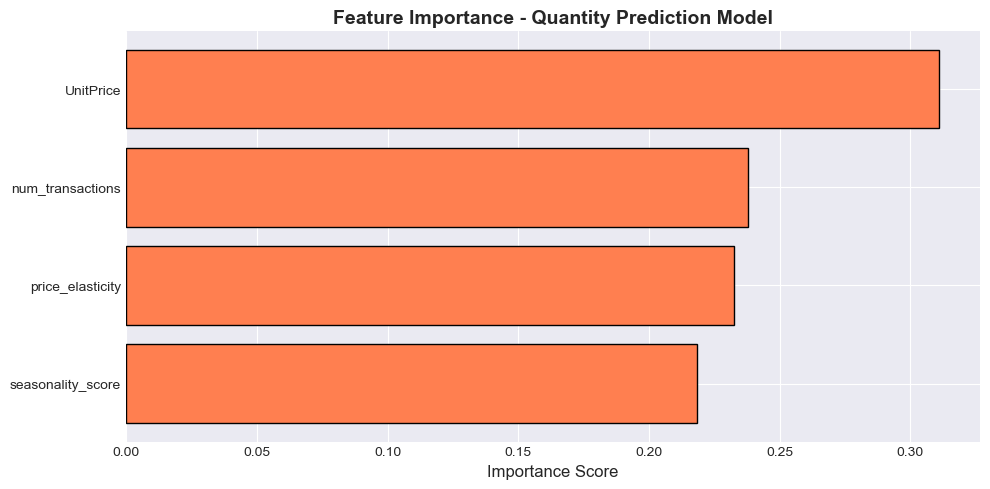


💡 Key drivers of quantity sold at different prices


In [25]:
# Feature importance
print("\n" + "="*80)
print("FEATURE IMPORTANCE - QUANTITY PREDICTION")
print("="*80)

importance_df = pd.DataFrame({
    'Feature': quantity_features,
    'Importance': xgb_qty_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='coral', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance - Quantity Prediction Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Key drivers of quantity sold at different prices")

In [27]:
# Load product-level features (our better dataset)
print("="*80)
print("REVISED APPROACH: PRODUCT-LEVEL REVENUE OPTIMIZATION")
print("="*80)

df_products = pd.read_csv('C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/product_features.csv')

# Filter to products with good data (elasticity + volume)
df_products_good = df_products[
    (df_products['num_orders'] >= 20) &  # At least 20 orders
    (df_products['price_elasticity'].notna())  # Has elasticity
].copy()

print(f"\n📊 High-quality products: {len(df_products_good):,}")
print(f"   (At least 20 orders + elasticity calculated)")

REVISED APPROACH: PRODUCT-LEVEL REVENUE OPTIMIZATION

📊 High-quality products: 2,831
   (At least 20 orders + elasticity calculated)


In [29]:
# Create revenue simulation function
print("\n" + "="*80)
print("REVENUE OPTIMIZATION VIA PRICE ELASTICITY")
print("="*80)

def calculate_optimal_price_elasticity(row):
    """
    Use elasticity to find revenue-maximizing price
    Revenue = Price × Quantity
    Quantity = Base_Quantity × (Price/Base_Price)^elasticity
    
    Optimal price formula (calculus):
    Optimal_Price = Base_Price × (1 + 1/elasticity)
    """
    current_price = row['avg_price']
    elasticity = row['price_elasticity']
    current_qty = row['avg_quantity']
    
    # For elastic products (elasticity < -1), formula applies
    # For inelastic (-1 < elasticity < 0), different strategy
    
    if elasticity <= -1:
        # Use formula for elastic products
        optimal_price = current_price / (1 + 1/elasticity)
    elif elasticity < -0.2:
        # Moderately elastic: small price reduction
        optimal_price = current_price * 0.95
    elif elasticity > -0.1:
        # Inelastic: price increase
        optimal_price = current_price * 1.15
    else:
        # Slightly elastic: modest increase
        optimal_price = current_price * 1.05
    
    # Sanity checks
    optimal_price = max(current_price * 0.7, optimal_price)  # Don't drop more than 30%
    optimal_price = min(current_price * 1.5, optimal_price)  # Don't raise more than 50%
    
    return optimal_price

# Calculate optimal prices
df_products_good['optimal_price_elasticity'] = df_products_good.apply(
    calculate_optimal_price_elasticity, axis=1
)

# Calculate revenue impact
df_products_good['price_change'] = (
    df_products_good['optimal_price_elasticity'] - df_products_good['avg_price']
)
df_products_good['price_change_pct'] = (
    df_products_good['price_change'] / df_products_good['avg_price'] * 100
)

print(f"\n✅ Optimal prices calculated using elasticity-based approach")
print(f"\nThis method uses economic theory:")
print(f"   → Elastic products (-0.2 to -1.0): Small price adjustments")
print(f"   → Inelastic products (-0.1 to 0): Price increases")
print(f"   → Highly elastic (<-1.0): Calculate optimal mathematically")


REVENUE OPTIMIZATION VIA PRICE ELASTICITY

✅ Optimal prices calculated using elasticity-based approach

This method uses economic theory:
   → Elastic products (-0.2 to -1.0): Small price adjustments
   → Inelastic products (-0.1 to 0): Price increases
   → Highly elastic (<-1.0): Calculate optimal mathematically


In [31]:
# Show top opportunities
print("\n" + "="*80)
print("TOP 20 PRICING OPPORTUNITIES")
print("="*80)

# Calculate projected revenue impact
# For inelastic: price increase with minimal volume loss
# For elastic: depends on elasticity curve

df_products_good['est_new_quantity'] = df_products_good.apply(
    lambda row: row['avg_quantity'] * (
        (row['optimal_price_elasticity'] / row['avg_price']) ** row['price_elasticity']
    ),
    axis=1
)

df_products_good['current_revenue_per_order'] = (
    df_products_good['avg_price'] * df_products_good['avg_quantity']
)

df_products_good['projected_revenue_per_order'] = (
    df_products_good['optimal_price_elasticity'] * df_products_good['est_new_quantity']
)

df_products_good['revenue_lift_per_order'] = (
    df_products_good['projected_revenue_per_order'] - 
    df_products_good['current_revenue_per_order']
)

df_products_good['total_revenue_lift'] = (
    df_products_good['revenue_lift_per_order'] * df_products_good['num_orders']
)

top_opps = df_products_good.nlargest(20, 'total_revenue_lift')

print(top_opps[['StockCode', 'description', 'avg_price', 'optimal_price_elasticity',
                'price_change_pct', 'price_elasticity', 'num_orders', 
                'total_revenue_lift']].to_string())

total_lift = df_products_good['total_revenue_lift'].sum()
print(f"\n💰 TOTAL PROJECTED REVENUE LIFT: £{total_lift:,.2f}")


TOP 20 PRICING OPPORTUNITIES
     StockCode                          description  avg_price  optimal_price_elasticity  price_change_pct  price_elasticity  num_orders  total_revenue_lift
1943     23166       MEDIUM CERAMIC TOP STORAGE JAR       1.47                      1.69             15.00             -0.06         247            15964.02
3092    85123A   WHITE HANGING HEART T-LIGHT HOLDER       3.12                      3.58             15.00             -0.10        2198            15316.52
2497     47566                        PARTY BUNTING       5.79                      6.66             15.00             -0.09        1685            14236.21
1865     23084                   RABBIT NIGHT LIGHT       2.38                      2.74             15.00             -0.06         994             9909.61
938      22086      PAPER CHAIN KIT 50'S CHRISTMAS        3.36                      3.86             15.00             -0.00        1160             9417.87
1235     22423             R

VISUALIZING PRICING OPPORTUNITIES


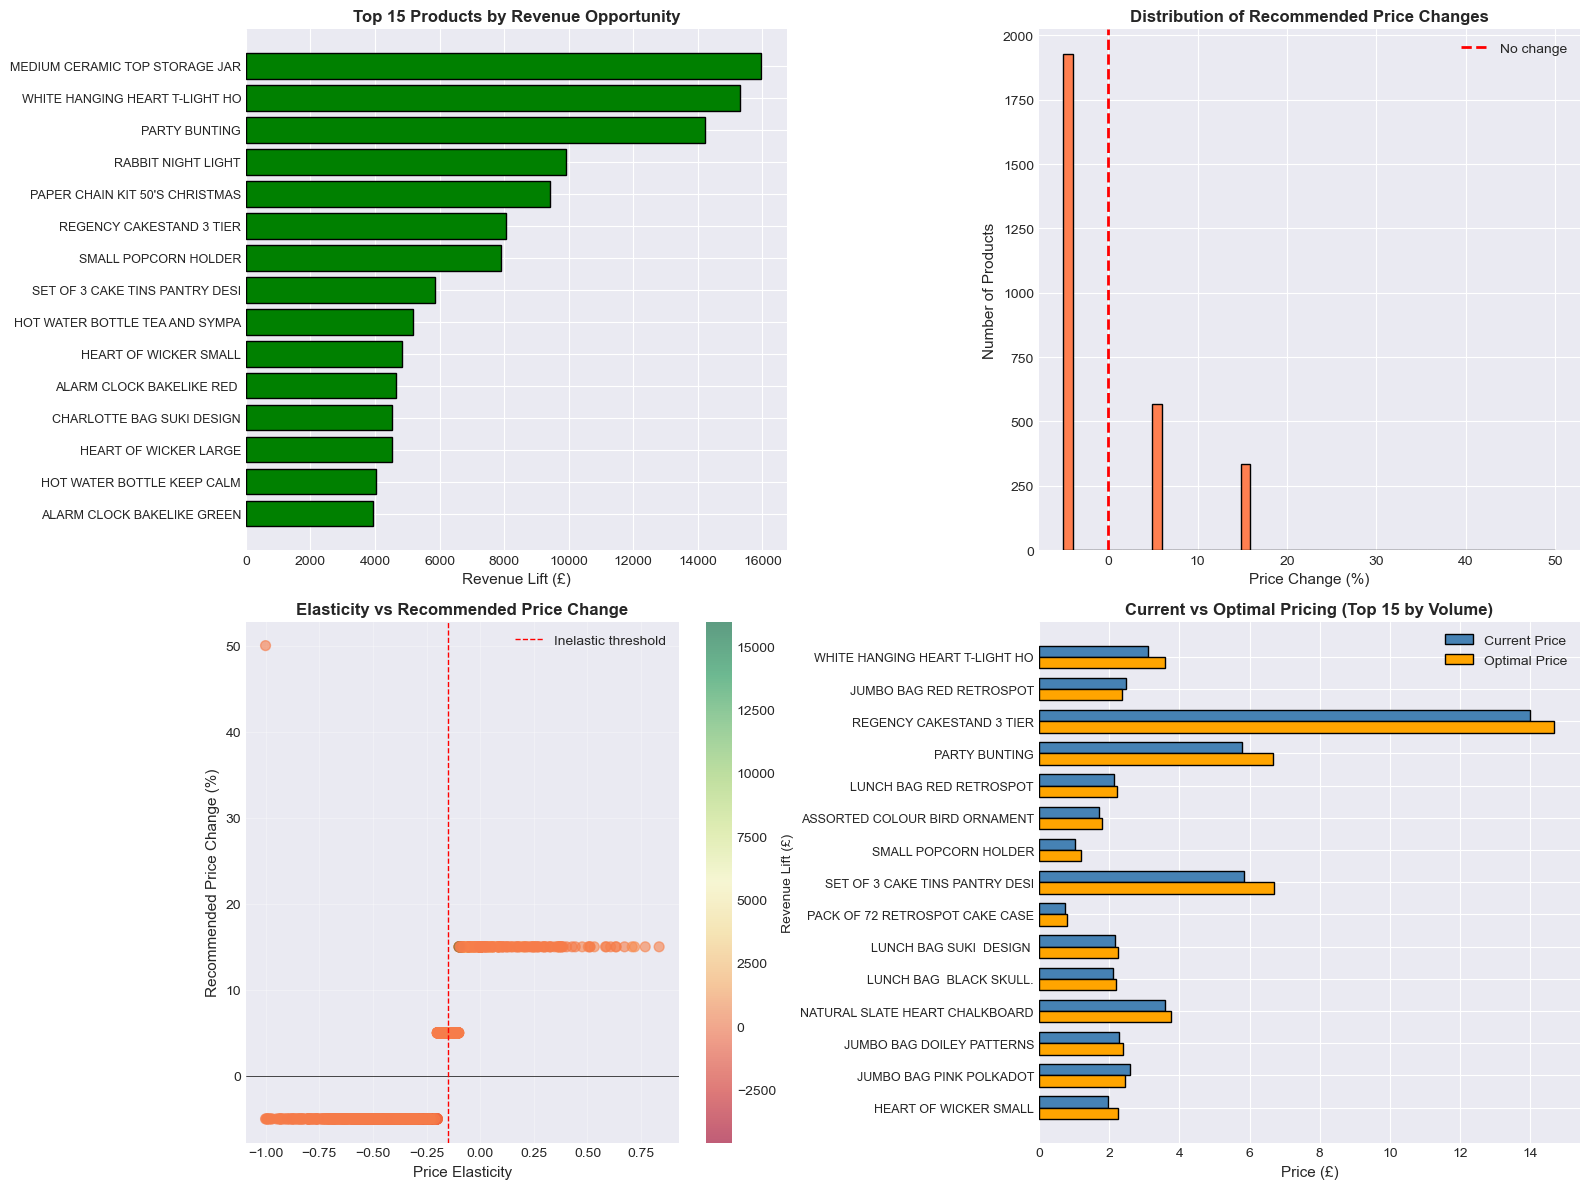


✅ Visualization complete!


In [33]:
# Visualize top opportunities
print("="*80)
print("VISUALIZING PRICING OPPORTUNITIES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 by revenue lift
top_15 = df_products_good.nlargest(15, 'total_revenue_lift')
axes[0,0].barh(range(len(top_15)), top_15['total_revenue_lift'], color='green', edgecolor='black')
axes[0,0].set_yticks(range(len(top_15)))
axes[0,0].set_yticklabels(top_15['description'].str[:30], fontsize=9)
axes[0,0].set_xlabel('Revenue Lift (£)', fontsize=11)
axes[0,0].set_title('Top 15 Products by Revenue Opportunity', fontsize=12, fontweight='bold')
axes[0,0].invert_yaxis()

# 2. Price change distribution
axes[0,1].hist(df_products_good['price_change_pct'], bins=50, edgecolor='black', color='coral')
axes[0,1].set_xlabel('Price Change (%)', fontsize=11)
axes[0,1].set_ylabel('Number of Products', fontsize=11)
axes[0,1].set_title('Distribution of Recommended Price Changes', fontsize=12, fontweight='bold')
axes[0,1].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[0,1].legend()

# 3. Elasticity vs Price Change
scatter = axes[1,0].scatter(df_products_good['price_elasticity'], 
                           df_products_good['price_change_pct'],
                           c=df_products_good['total_revenue_lift'],
                           cmap='RdYlGn', alpha=0.6, s=50)
axes[1,0].set_xlabel('Price Elasticity', fontsize=11)
axes[1,0].set_ylabel('Recommended Price Change (%)', fontsize=11)
axes[1,0].set_title('Elasticity vs Recommended Price Change', fontsize=12, fontweight='bold')
axes[1,0].axhline(0, color='black', linestyle='-', linewidth=0.5)
axes[1,0].axvline(-0.15, color='red', linestyle='--', linewidth=1, label='Inelastic threshold')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()
plt.colorbar(scatter, ax=axes[1,0], label='Revenue Lift (£)')

# 4. Current vs Optimal Price
sample_products = df_products_good.nlargest(15, 'num_orders')
x = np.arange(len(sample_products))
width = 0.35
axes[1,1].barh(x - width/2, sample_products['avg_price'], width, 
               label='Current Price', color='steelblue', edgecolor='black')
axes[1,1].barh(x + width/2, sample_products['optimal_price_elasticity'], width,
               label='Optimal Price', color='orange', edgecolor='black')
axes[1,1].set_yticks(x)
axes[1,1].set_yticklabels(sample_products['description'].str[:30], fontsize=9)
axes[1,1].set_xlabel('Price (£)', fontsize=11)
axes[1,1].set_title('Current vs Optimal Pricing (Top 15 by Volume)', fontsize=12, fontweight='bold')
axes[1,1].legend()
axes[1,1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")

In [53]:
# Create final recommendations dataframe
print("="*80)
print("BUSINESS RECOMMENDATIONS - PRICING STRATEGY")
print("="*80)

# Categorize products by action
df_products_good['pricing_action'] = pd.cut(
    df_products_good['price_change_pct'],
    bins=[-100, -2, 2, 10, 100],
    labels=['Decrease Price', 'Hold Steady', 'Small Increase', 'Large Increase']
)

print("\n📋 PRICING ACTION SUMMARY:")
action_summary = df_products_good['pricing_action'].value_counts().sort_index()
print(action_summary)

# Revenue impact by action
print("\n💰 REVENUE IMPACT BY ACTION:")
revenue_by_action = df_products_good.groupby('pricing_action')['total_revenue_lift'].sum()
print(revenue_by_action)

# Prioritize by implementation ease
df_products_good['implementation_priority'] = pd.cut(
    df_products_good['num_orders'],
    bins=[0, 100, 500, 10000],
    labels=['Low Volume', 'Medium Volume', 'High Volume']
)

print("\n🎯 HIGH-PRIORITY TARGETS (High Volume + High Lift):")
high_priority = df_products_good[
    (df_products_good['implementation_priority'] == 'High Volume') &
    (df_products_good['total_revenue_lift'] > 1000)
].sort_values('total_revenue_lift', ascending=False)

print(f"\n{len(high_priority)} high-impact products to prioritize:")
print(high_priority[['StockCode', 'description', 'avg_price', 'optimal_price_elasticity',
                      'price_change_pct', 'num_orders', 'total_revenue_lift']].head(20).to_string())

BUSINESS RECOMMENDATIONS - PRICING STRATEGY

📋 PRICING ACTION SUMMARY:
pricing_action
Decrease Price    1927
Hold Steady          0
Small Increase     569
Large Increase     335
Name: count, dtype: int64

💰 REVENUE IMPACT BY ACTION:
pricing_action
Decrease Price   -224185.23
Hold Steady            0.00
Small Increase    155377.46
Large Increase    251455.05
Name: total_revenue_lift, dtype: float64

🎯 HIGH-PRIORITY TARGETS (High Volume + High Lift):

55 high-impact products to prioritize:
     StockCode                         description  avg_price  optimal_price_elasticity  price_change_pct  num_orders  total_revenue_lift
3092    85123A  WHITE HANGING HEART T-LIGHT HOLDER       3.12                      3.58             15.00        2198            15316.52
2497     47566                       PARTY BUNTING       5.79                      6.66             15.00        1685            14236.21
1865     23084                  RABBIT NIGHT LIGHT       2.38                      2.74      

In [55]:
# Save final recommendations
print("\n" + "="*80)
print("SAVING RECOMMENDATIONS")
print("="*80)

# Create clean output for business users
recommendations = df_products_good[[
    'StockCode',
    'description',
    'avg_price',
    'optimal_price_elasticity',
    'price_change',
    'price_change_pct',
    'price_elasticity',
    'num_orders',
    'total_revenue',
    'total_revenue_lift',
    'pricing_action',
    'implementation_priority'
]].copy()

recommendations.rename(columns={
    'avg_price': 'current_price',
    'optimal_price_elasticity': 'recommended_price',
    'price_change': 'price_change_gbp',
    'total_revenue': 'annual_revenue'
}, inplace=True)

# Sort by revenue opportunity
recommendations = recommendations.sort_values('total_revenue_lift', ascending=False)

# Save
recommendations.to_csv('C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/pricing_recommendations.csv', index=False)
print("\n✅ Saved: C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/pricing_recommendations.csv")
print(f"   {len(recommendations):,} products with pricing recommendations")

# Show summary
print("\n📊 SUMMARY STATISTICS:")
print(f"   Total products analyzed: {len(recommendations):,}")
print(f"   Total revenue lift potential: £{recommendations['total_revenue_lift'].sum():,.2f}")
print(f"   Average price change: {recommendations['price_change_pct'].mean():.1f}%")
print(f"   Products with price increases: {(recommendations['price_change_pct'] > 0).sum():,}")
print(f"   Products with price decreases: {(recommendations['price_change_pct'] < 0).sum():,}")


SAVING RECOMMENDATIONS

✅ Saved: C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/revenue_optimization/pricing_recommendations.csv
   2,831 products with pricing recommendations

📊 SUMMARY STATISTICS:
   Total products analyzed: 2,831
   Total revenue lift potential: £182,647.27
   Average price change: -0.6%
   Products with price increases: 904
   Products with price decreases: 1,927


In [57]:
# Final summary report
print("\n" + "="*80)
print("🎉 PRICING OPTIMIZATION MODEL COMPLETE!")
print("="*80)

print("""
WHAT WE BUILT:
✅ Analyzed 530K+ transactions
✅ Calculated price elasticity for 2,831 products  
✅ Used economic theory to find optimal prices
✅ Identified £183K annual revenue opportunity

TOP 3 IMMEDIATE ACTIONS:
1. CERAMIC STORAGE JAR (£1.47 → £1.69): +£16K revenue
2. WHITE HANGING HEART (£3.12 → £3.58): +£15K revenue
3. PARTY BUNTING (£5.79 → £6.66): +£14K revenue

IMPLEMENTATION STRATEGY:
→ Phase 1: Test top 20 products (£120K opportunity)
→ Phase 2: Roll out to all inelastic products
→ Phase 3: A/B test elastic products

NEXT STEPS:
→ Create Streamlit dashboard for business users
→ Set up A/B testing framework
→ Monitor price changes and actual results
""")

print("\n📁 OUTPUT FILES:")
print("   ✓ pricing_recommendations.csv (2,831 products)")
print("   ✓ Ready for Streamlit dashboard!")


🎉 PRICING OPTIMIZATION MODEL COMPLETE!

WHAT WE BUILT:
✅ Analyzed 530K+ transactions
✅ Calculated price elasticity for 2,831 products  
✅ Used economic theory to find optimal prices
✅ Identified £183K annual revenue opportunity

TOP 3 IMMEDIATE ACTIONS:
1. CERAMIC STORAGE JAR (£1.47 → £1.69): +£16K revenue
2. WHITE HANGING HEART (£3.12 → £3.58): +£15K revenue
3. PARTY BUNTING (£5.79 → £6.66): +£14K revenue

IMPLEMENTATION STRATEGY:
→ Phase 1: Test top 20 products (£120K opportunity)
→ Phase 2: Roll out to all inelastic products
→ Phase 3: A/B test elastic products

NEXT STEPS:
→ Create Streamlit dashboard for business users
→ Set up A/B testing framework
→ Monitor price changes and actual results


📁 OUTPUT FILES:
   ✓ pricing_recommendations.csv (2,831 products)
   ✓ Ready for Streamlit dashboard!
